In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
# plt.rc('text', usetex=True)
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)

X shape: (100, 2)
Y shape: (100,)


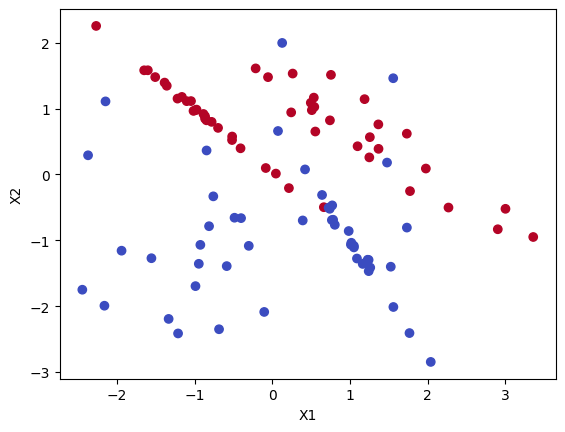

In [12]:
# sklearn toy dataset for binary classification
X, y  = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=12)
print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

# plot the data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

Decision Boundary
* A line that separates training examples of different classes
* A threshold halfway between observations on the edge of clusters



**How to represent the decision boundary mathematically?** 
* Hint: Think about Linear Regresssion. Now that the target variable $y$ become a feature $x_2$

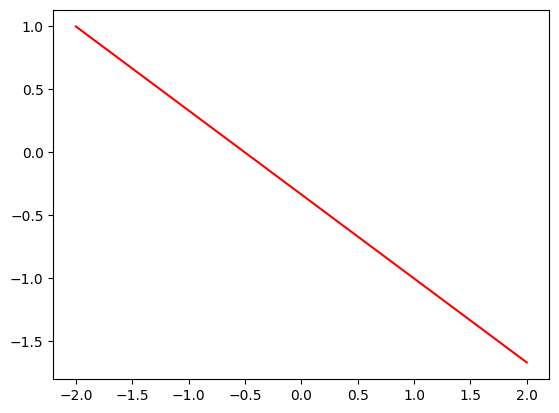

In [15]:
# y = w1*x1 + w0
# w1*x1 + w0 - y = 0
# Change the form to: w0 + w1*x1 + w2*x2 = 0
 
w = np.array([0.1, 0.2, 0.3])
# generate a grid of points in the space of x1 and x2 satisfying the equation w0 + w1*x1 + w2*x2 = 0
x1 = np.linspace(-2, 2, 100)
x2 = -(w[0] + w[1]*x1)/w[2]

# plot the line
plt.plot(x1, x2, 'r', label='Decision Boundary')


[hyperplane](https://en.wikipedia.org/wiki/Hyperplane) in high dimensional space
* a point is a hyperplane in 1-dimensional space, a line is a hyperplane in 2-dimensional space, and a plane is a hyperplane in 3-dimensional space
* $a_1 x_1+a_2 x_2+\cdots+a_n x_n=b$

Decision Boundary for Logistic Regression
* What property does the decision boundary satisfy? Let's use 0.5 as probability threshold.

coefficients shape: (1, 2)
intercept shape: (1,)
xd: [-1  2]
yd: [ 0.37595746 -0.55566865]


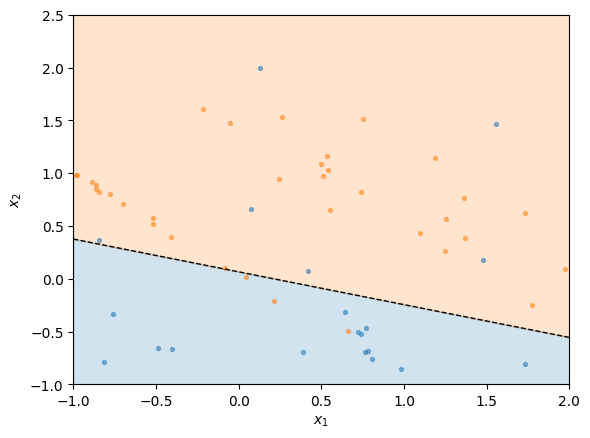

In [14]:
clf = LogisticRegression(multi_class="multinomial", solver="sag")
clf.fit(X, y)
print(f'coefficients shape: {clf.coef_.shape}')
print(f'intercept shape: {clf.intercept_.shape}')

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# print(f'w1: {w1}')
# print(f'w2: {w2}')
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 2
xd = np.array([xmin, xmax])
print(f'xd: {xd}')
yd = m*xd + c
print(f'yd: {yd}')
plt.plot(xd, yd, 'k', lw=1, ls='--')

# plot the areas separated by the decision boundary
ymin, ymax = -1, 2.5
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

# plot the data points
plt.scatter(*X[y==0].T, s=8, alpha=0.5)
plt.scatter(*X[y==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()